Analyse

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

#Analyse
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy import stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.collections import LineCollection
import plotly.express as px
from scipy.stats import shapiro
import statsmodels.api
from sklearn.cluster import KMeans

## 1. Ouverture du fichier

In [2]:
data = pd.read_csv('notebookexploration.csv',encoding='utf-8', low_memory=False)

In [3]:
df = pd.DataFrame(data)

## 2. Visualisation des données

### 1. Affichage des données

In [4]:
df.head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr
0,0000000016650,2017-03-09T10:34:28.000000,2017-03-09T10:34:28.000000,Organic Penne Pasta,US,d,0.0,0.0,0.0,1540.0,1.75,1.72893,73.68,38.614034,1.8,14.04,0.049107,0.019333,11.089328
1,0000000016872,2017-03-09T10:34:10.000000,2017-03-09T10:34:11.000000,Zen Party Mix,US,d,1.0,0.0,0.0,2230.0,36.67,5.00000,36.67,3.330000,6.7,16.67,1.607820,0.633000,12.000000
2,0000000018173,2017-03-09T10:34:27.000000,2017-03-09T10:34:27.000000,Organic Sweetened Banana Chips,US,d,0.0,0.0,0.0,2092.0,26.67,23.33000,66.67,16.670000,3.3,3.33,0.000000,0.000000,20.608340
3,0000000018227,2017-03-09T10:34:42.000000,2017-03-09T10:34:42.000000,Organic Oat Groats,US,a,0.0,0.0,0.0,1096.0,5.95,1.19000,66.67,2.380000,9.5,16.67,0.025400,0.010000,-6.000000
4,0000000018265,2017-03-09T10:35:06.000000,2017-03-09T10:35:06.000000,Energy Power Mix,US,d,0.0,0.0,0.0,1464.0,17.50,7.50000,42.50,32.500000,5.0,7.50,0.284480,0.112000,14.000000


### 2. Information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198614 entries, 0 to 198613
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   code                    198614 non-null  object 
 1   created_datetime        198613 non-null  object 
 2   last_modified_datetime  198614 non-null  object 
 3   product_name            195776 non-null  object 
 4   countries               198560 non-null  object 
 5   nutrition_grade_fr      198614 non-null  object 
 6   additives_n             198614 non-null  float64
 7   palm_oil                198614 non-null  float64
 8   maybe_palm_oil          198614 non-null  float64
 9   energy                  198614 non-null  float64
 10  fat_100g                198614 non-null  float64
 11  saturated-fat           198614 non-null  float64
 12  carbohydrates_100g      198614 non-null  float64
 13  sugars                  198614 non-null  float64
 14  fiber_100g          

In [6]:
df.shape

(198614, 19)

In [7]:
df.columns

Index(['code', 'created_datetime', 'last_modified_datetime', 'product_name',
       'countries', 'nutrition_grade_fr', 'additives_n', 'palm_oil',
       'maybe_palm_oil', 'energy', 'fat_100g', 'saturated-fat',
       'carbohydrates_100g', 'sugars', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium', 'nutrition-score-fr'],
      dtype='object')

### 3. Conversion

#### 1. Objet en Date

In [8]:
def conversionDate(indicateur_date):
    """
    Entrée : Liste de date
    Objectif : Convertir la liste en datetime
    Sortie : DataFrame en bonne conversion
    """
    
    for i in range(0,len(indicateur_date),1):
        df[indicateur_date[i]] = pd.to_datetime(df[indicateur_date[i]], format="%Y-%m-%dT%H:%M:%S.%f", errors = 'coerce')
    return df

In [9]:
indicateur_date = ([
'created_datetime',
'last_modified_datetime'])
conversionDate(indicateur_date).head()

,code,created_datetime,last_modified_datetime,product_name,countries,nutrition_grade_fr,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr
0,0000000016650,2017-03-09 10:34:28,2017-03-09 10:34:28,Organic Penne Pasta,US,d,0.0,0.0,0.0,1540.0,1.75,1.72893,73.68,38.614034,1.8,14.04,0.049107,0.019333,11.089328
1,0000000016872,2017-03-09 10:34:10,2017-03-09 10:34:11,Zen Party Mix,US,d,1.0,0.0,0.0,2230.0,36.67,5.00000,36.67,3.330000,6.7,16.67,1.607820,0.633000,12.000000
2,0000000018173,2017-03-09 10:34:27,2017-03-09 10:34:27,Organic Sweetened Banana Chips,US,d,0.0,0.0,0.0,2092.0,26.67,23.33000,66.67,16.670000,3.3,3.33,0.000000,0.000000,20.608340
3,0000000018227,2017-03-09 10:34:42,2017-03-09 10:34:42,Organic Oat Groats,US,a,0.0,0.0,0.0,1096.0,5.95,1.19000,66.67,2.380000,9.5,16.67,0.025400,0.010000,-6.000000
4,0000000018265,2017-03-09 10:35:06,2017-03-09 10:35:06,Energy Power Mix,US,d,0.0,0.0,0.0,1464.0,17.50,7.50000,42.50,32.500000,5.0,7.50,0.284480,0.112000,14.000000


#### 2. Objet en string

In [10]:
def conversion (df):
    """
    Entrée : DataFrame
    Objectif : Selectionner les colonnes de types objets et les convertir en string
    Sortie ; DataFrame convertit
    """
    col = df.select_dtypes(include = 'object').columns
    df[col] = df[col].astype('string')
    return df

In [11]:
df = conversion(df)
df.dtypes

code                              string
created_datetime          datetime64[ns]
last_modified_datetime    datetime64[ns]
product_name                      string
countries                         string
nutrition_grade_fr                string
additives_n                      float64
palm_oil                         float64
maybe_palm_oil                   float64
energy                           float64
fat_100g                         float64
saturated-fat                    float64
carbohydrates_100g               float64
sugars                           float64
fiber_100g                       float64
proteins_100g                    float64
salt_100g                        float64
sodium                           float64
nutrition-score-fr               float64
dtype: object

In [12]:
def tauxRemplissage(df):
    """
    Entrée : DataFrame
    Objectifs : Calcul du taux de remplissage, 1 beaucoup de données, 0 beaucoup de valeurs manquantes
    Sorties : DataFrame
    """
        
    val = 1 - df.isna().sum()/len(df)
    val = pd.DataFrame(val)
    val = val.transpose()
    return val

##########################################################################################

def graphRemplissage(df) :
    """
    Entrée : Dataframe
    Objectifs : Récupérer la DataFrame du taux de remplissage et afficher le graphique du taux de remplissage
    Sortie : Graphe
    """

    df = tauxRemplissage (df)
    fig,ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (5,5)
    plt.rcParams.update({'font.size': 12})
    ax.tick_params(axis='x', rotation=90)
    sns.barplot( data=df, color = 'blue' )
    plt.xlabel('\nColonnes', fontsize=10)
    plt.ylabel('Taux de valeurs\n', fontsize=10)
    plt.gca().xaxis.set_tick_params(labelsize = 10)
    plt.gca().yaxis.set_tick_params(labelsize = 10)
    plt.title("Taux de remplissage", fontsize=10,fontweight = 'bold')

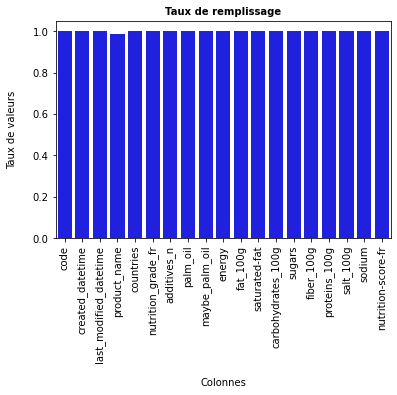

In [13]:
#Affichage du taux de remplissage
graphRemplissage(df)

In [14]:
df.isna().sum()

code                         0
created_datetime             1
last_modified_datetime       0
product_name              2838
countries                   54
nutrition_grade_fr           0
additives_n                  0
palm_oil                     0
maybe_palm_oil               0
energy                       0
fat_100g                     0
saturated-fat                0
carbohydrates_100g           0
sugars                       0
fiber_100g                   0
proteins_100g                0
salt_100g                    0
sodium                       0
nutrition-score-fr           0
dtype: int64

### 4. Description

In [15]:
colonne = ['additives_n', 'palm_oil', 'fat_100g', 'sugars', 'energy',
'fiber_100g','proteins_100g','salt_100g']
df1 = df[colonne]
df1.describe()

,additives_n,palm_oil,fat_100g,sugars,energy,fiber_100g,proteins_100g,salt_100g
count,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000
mean,2.069295,0.028296,12.057660,14.371346,1096.574772,1.831847,7.353430,1.264913
std,2.530478,0.160203,14.800166,19.259220,717.013649,3.074170,7.705687,3.984814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,1.200000,430.000000,0.000000,1.640000,0.104140
50%,1.000000,0.000000,6.500000,4.900000,1075.000000,0.600000,5.260000,0.670000
75%,3.000000,0.000000,19.500000,21.700000,1628.000000,2.700000,10.290000,1.399540
max,31.000000,2.000000,100.000000,100.000000,3700.000000,100.000000,90.000000,100.000000


In [16]:
df.describe()

,additives_n,palm_oil,maybe_palm_oil,energy,fat_100g,saturated-fat,carbohydrates_100g,sugars,fiber_100g,proteins_100g,salt_100g,sodium,nutrition-score-fr
count,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000,198614.000000
mean,2.069295,0.028296,0.068673,1096.574772,12.057660,4.647623,30.887182,14.371346,1.831847,7.353430,1.264913,0.498450,8.903633
std,2.530478,0.160203,0.291197,717.013649,14.800166,7.086419,27.663080,19.259220,3.074170,7.705687,3.984814,1.578763,9.022367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,430.000000,0.800000,0.000000,6.450000,1.200000,0.000000,1.640000,0.104140,0.041000,1.000000
50%,1.000000,0.000000,0.000000,1075.000000,6.500000,1.600000,20.000000,4.900000,0.600000,5.260000,0.670000,0.263780,9.000000
75%,3.000000,0.000000,0.000000,1628.000000,19.500000,6.670000,55.410000,21.700000,2.700000,10.290000,1.399540,0.551000,16.000000
max,31.000000,2.000000,6.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,100.000000,51.471000,40.000000


Text(0.5, 1.0, 'Histogramme _ additives')

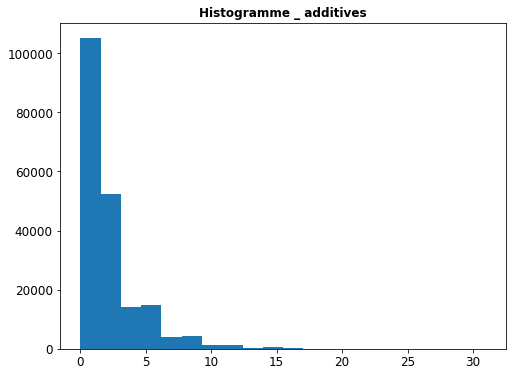

In [17]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["additives_n"], bins = 20)
plt.title("Histogramme _ additives", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ palm_oil')

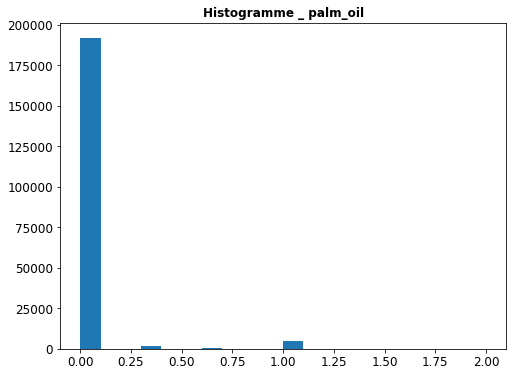

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["palm_oil"], bins = 20)
plt.title("Histogramme _ palm_oil", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ energy')

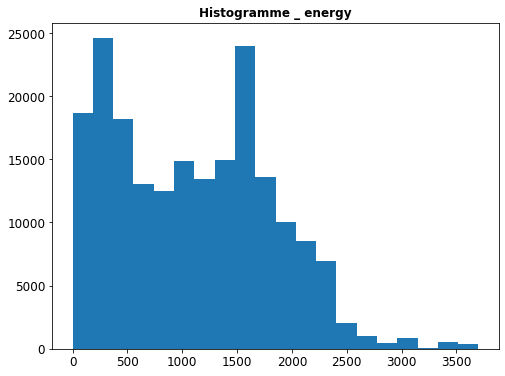

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["energy"], bins = 20)
plt.title("Histogramme _ energy", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ fat')

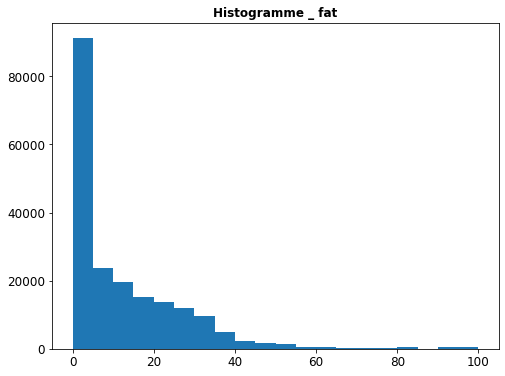

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["fat_100g"], bins = 20)
plt.title("Histogramme _ fat", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ sugars')

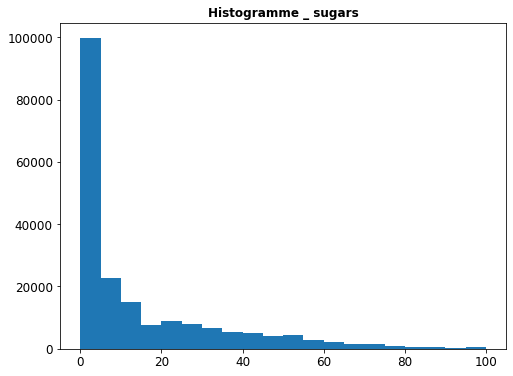

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["sugars"], bins = 20)
plt.title("Histogramme _ sugars", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ fiber')

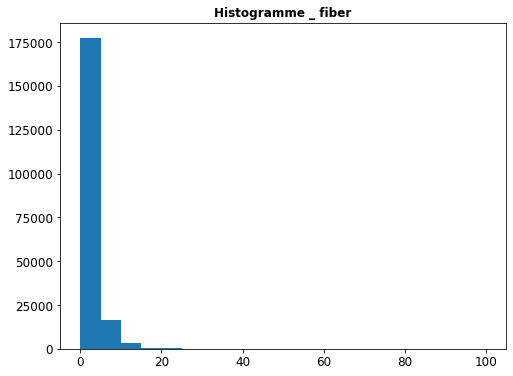

In [22]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["fiber_100g"], bins = 20)
plt.title("Histogramme _ fiber", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ proteins')

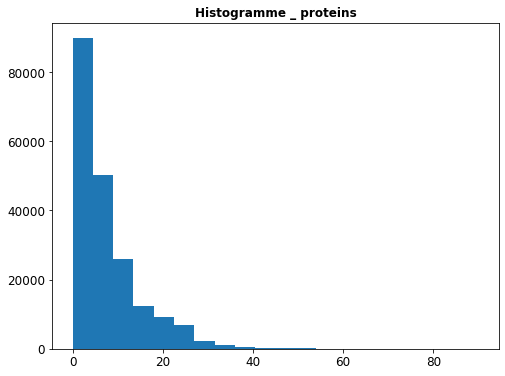

In [23]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["proteins_100g"], bins = 20)
plt.title("Histogramme _ proteins", fontsize=12,fontweight = 'bold')

Text(0.5, 1.0, 'Histogramme _ salt')

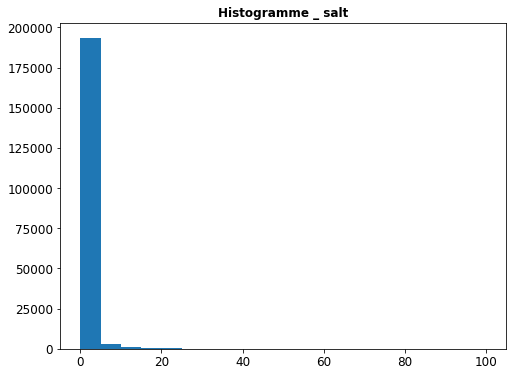

In [24]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df["salt_100g"], bins = 20)
plt.title("Histogramme _ salt", fontsize=12,fontweight = 'bold')

## 3. Proportion des pays

In [25]:
pays = df['countries'].value_counts().head(5)
pays.index

Index(['US', 'France', 'Suisse', 'Deutschland', 'España'], dtype='object')

Text(0.5, 1.0, 'Camembert des répartition de la nourriture par rapport au Pays')

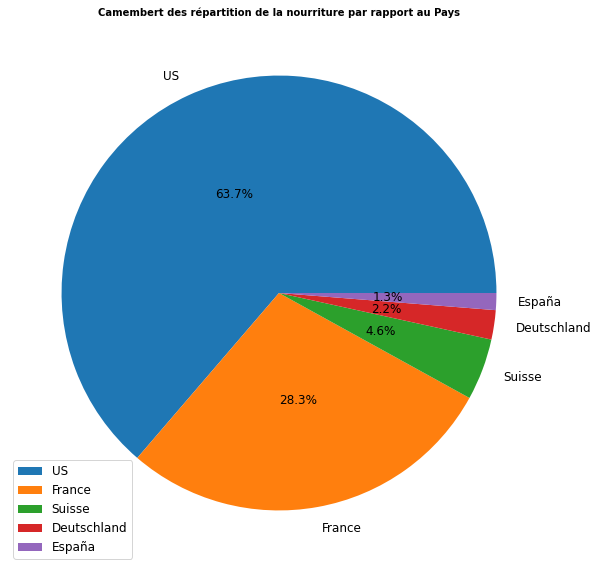

In [26]:
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(pays, labels = pays.index, autopct='%1.1f%%', pctdistance = 0.5)
plt.legend(loc = 'lower left')
plt.title("Camembert des répartition de la nourriture par rapport au Pays", fontsize=10,fontweight = 'bold')

## 4. Proportion des points du nutrition

In [27]:
grade = df.sort_values(by = 'nutrition_grade_fr')
grade_count = grade["nutrition_grade_fr"].value_counts
grade_count = grade_count(normalize=True)
grade_count = pd.DataFrame(grade_count)
grade_count = grade_count.reset_index()

In [28]:
grade_count = grade_count.sort_values(by = 'index')
grade_count.set_index('index')

,nutrition_grade_fr
index,
a,0.169077
b,0.160628
c,0.202846
d,0.277941
e,0.189508


In [29]:
palette = ["green", "limegreen","gold", "darkorange", "red"]

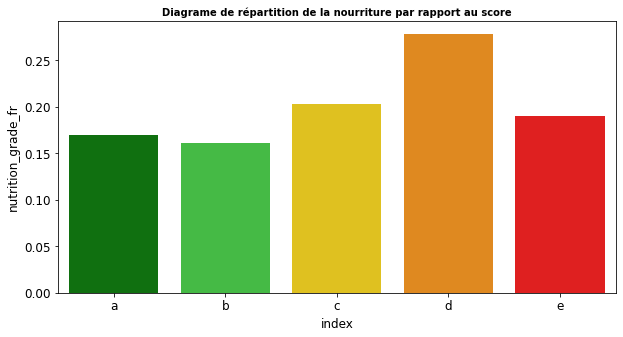

In [30]:
# Diagramme en bâtons
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot( data=grade_count, x ='index', y = 'nutrition_grade_fr', palette =palette)
plt.title("Diagrame de répartition de la nourriture par rapport au score", fontsize=10,fontweight = 'bold')
plt.show()

## 5. Analyse

Nombre de pays par rapport à la nutrition

In [31]:
df_grade = df.sort_values(by ='nutrition_grade_fr').copy()

In [32]:
t = pd.crosstab(df_grade.countries, df_grade.nutrition_grade_fr, normalize = "index")
t = t.reset_index()

In [33]:
US = t[t['countries'] == 'US']
France = t[t['countries'] == 'France']
Suisse = t[t['countries'] == 'Suisse']
Deutschland = t[t['countries'] == 'Deutschland']
España = t[t['countries'] == 'España']

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux produits US')

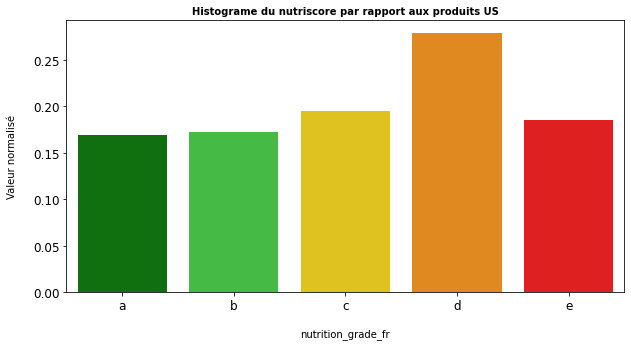

In [34]:
sns.barplot(data = US, palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('Valeur normalisé\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits US", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux produits de France')

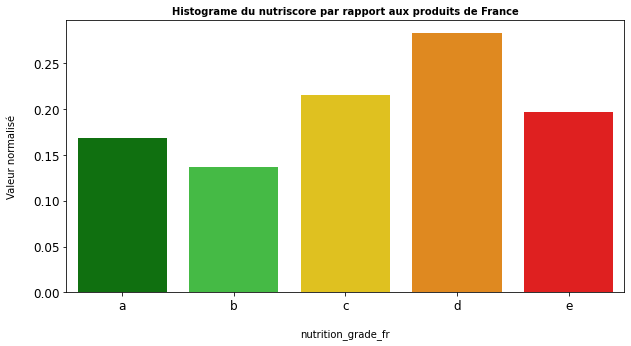

In [35]:
sns.barplot(data = France, palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('Valeur normalisé\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits de France", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux produits de Suisse')

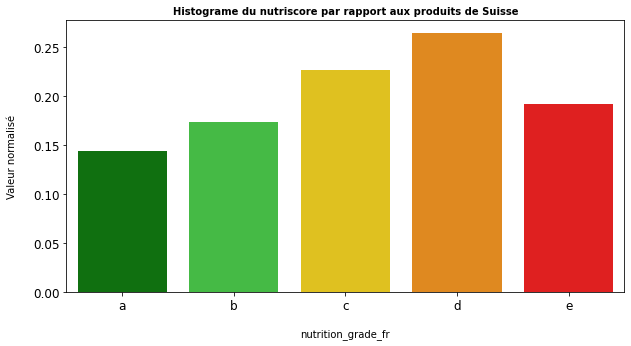

In [36]:
sns.barplot(data = Suisse, palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('Valeur normalisé\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits de Suisse", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, "Histograme du nutriscore par rapport aux produits d'Allemagne")

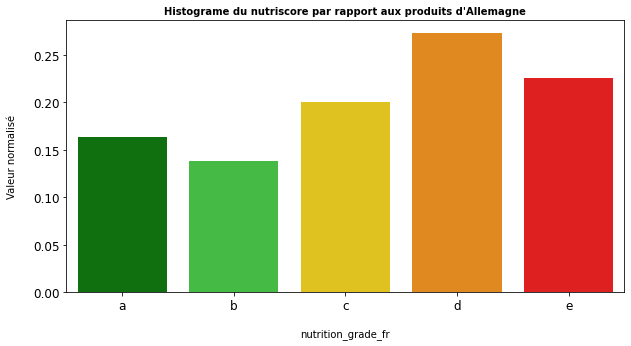

In [37]:
sns.barplot(data = Deutschland, palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('Valeur normalisé\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits d'Allemagne", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, "Histograme du nutriscore par rapport aux produits d'Espagne")

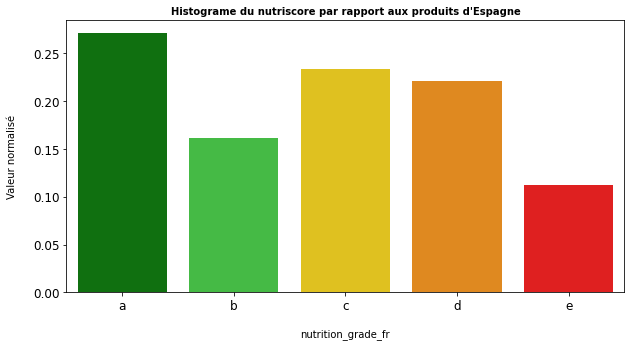

In [38]:
sns.barplot(data = España, palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('Valeur normalisé\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits d'Espagne", fontsize=10,fontweight = 'bold')

Nombre d'additif par rapport à la nutrition

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux additifs')

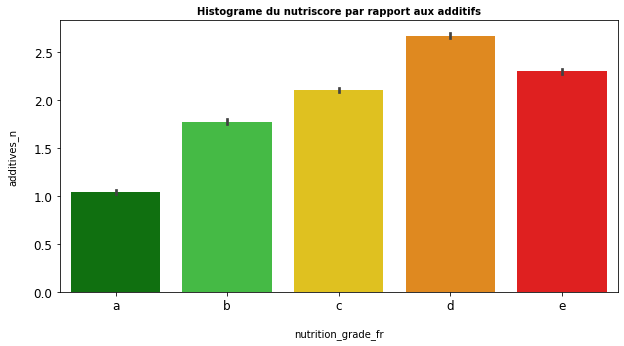

In [39]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'additives_n', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('additives_n\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux additifs", fontsize=10,fontweight = 'bold')

Huile de palme par rapport à la nutrtion

Text(0.5, 1.0, "Histograme du nutriscore par rapport aux produits ayant de l'huile de palme")

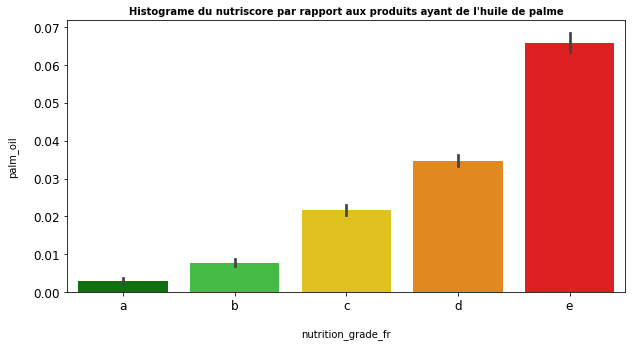

In [40]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'palm_oil', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('palm_oil\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits ayant de l'huile de palme", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, "Histograme du nutriscore par rapport aux produits pouvant contenir de l'huile de palme")

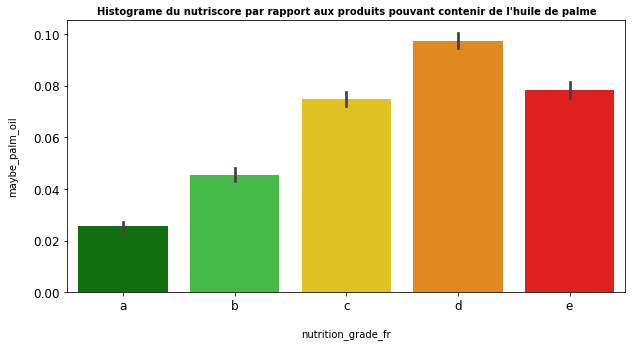

In [41]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'maybe_palm_oil', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('maybe_palm_oil\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux produits pouvant contenir de l'huile de palme", fontsize=10,fontweight = 'bold')

Énergie par rapport à la nutrition

Text(0.5, 1.0, "Histograme du nutriscore par rapport à l'énergie")

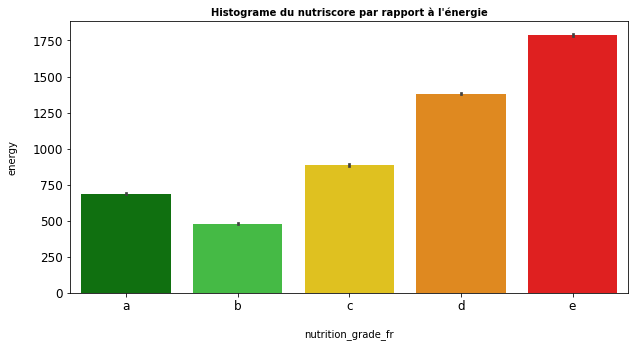

In [42]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'energy', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('energy\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport à l'énergie", fontsize=10,fontweight = 'bold')

Gras par rapport à la nutrition

Text(0.5, 1.0, 'Histograme du nutriscore par rapport au gras')

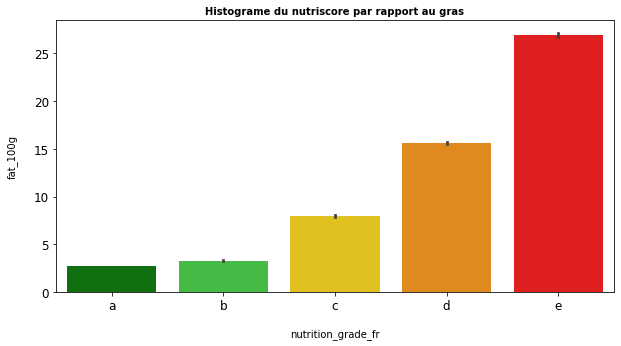

In [43]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'fat_100g', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('fat_100g\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport au gras", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, 'Histograme du nutriscore par rapport à la graisse saturée')

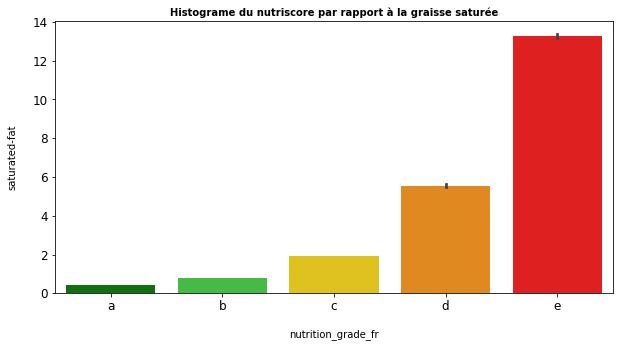

In [44]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'saturated-fat', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('saturated-fat\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport à la graisse saturée", fontsize=10,fontweight = 'bold')

Sucre par rapport à la nutrition

Text(0.5, 1.0, 'Histograme du nutriscore par rapport au sucre')

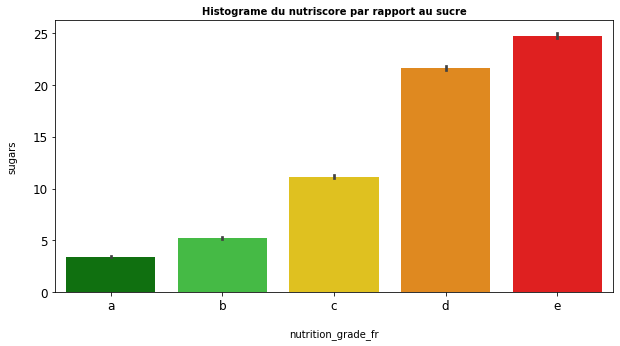

In [45]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'sugars', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('sugars\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport au sucre", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, 'Histograme du nutriscore par rapport au sucre lent')

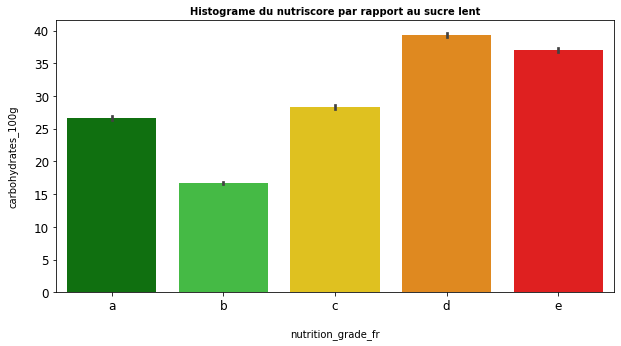

In [46]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'carbohydrates_100g', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('carbohydrates_100g\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport au sucre lent", fontsize=10,fontweight = 'bold')

Fibre par rapport à la nutrition

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux fibres')

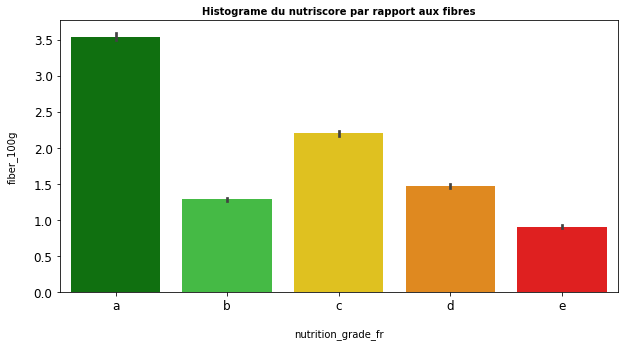

In [47]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'fiber_100g', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('fiber_100g\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux fibres", fontsize=10,fontweight = 'bold')

Protéine par rapport à la nutrition

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux protéines')

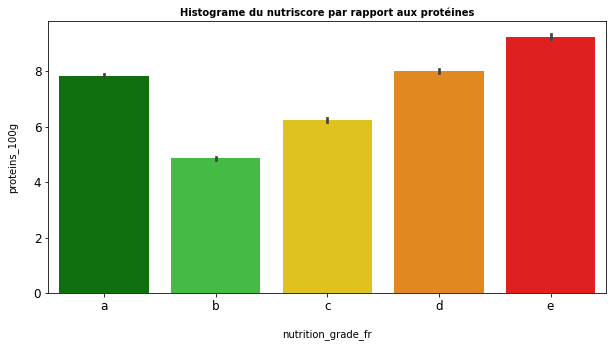

In [48]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'proteins_100g', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('proteins_100g\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux protéines", fontsize=10,fontweight = 'bold')

Sel par rapport à la nutrition

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux sels')

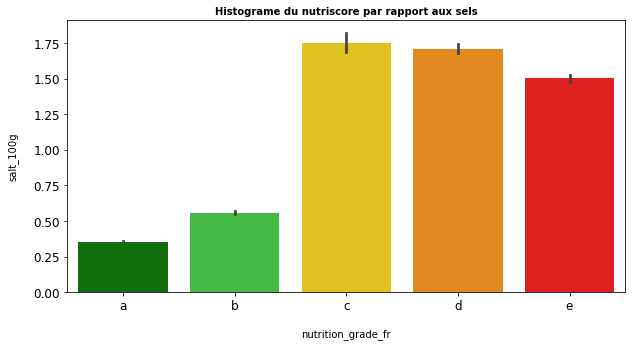

In [49]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'salt_100g', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('salt_100g\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux sels", fontsize=10,fontweight = 'bold')

Text(0.5, 1.0, 'Histograme du nutriscore par rapport aux sodiums')

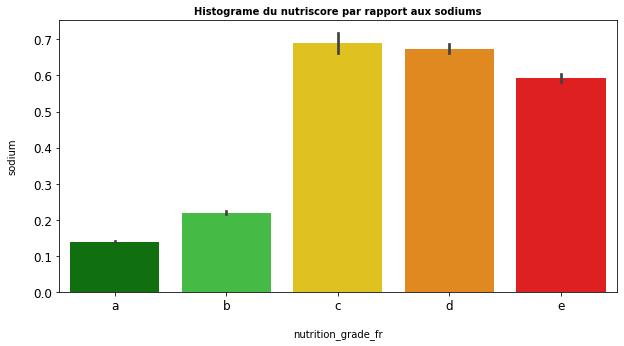

In [50]:
sns.barplot(data = df_grade , x='nutrition_grade_fr',y = 'sodium', palette = palette)
plt.xlabel('\nnutrition_grade_fr', fontsize=10)
plt.ylabel('sodium\n', fontsize=10)
plt.title("Histograme du nutriscore par rapport aux sodiums", fontsize=10,fontweight = 'bold')

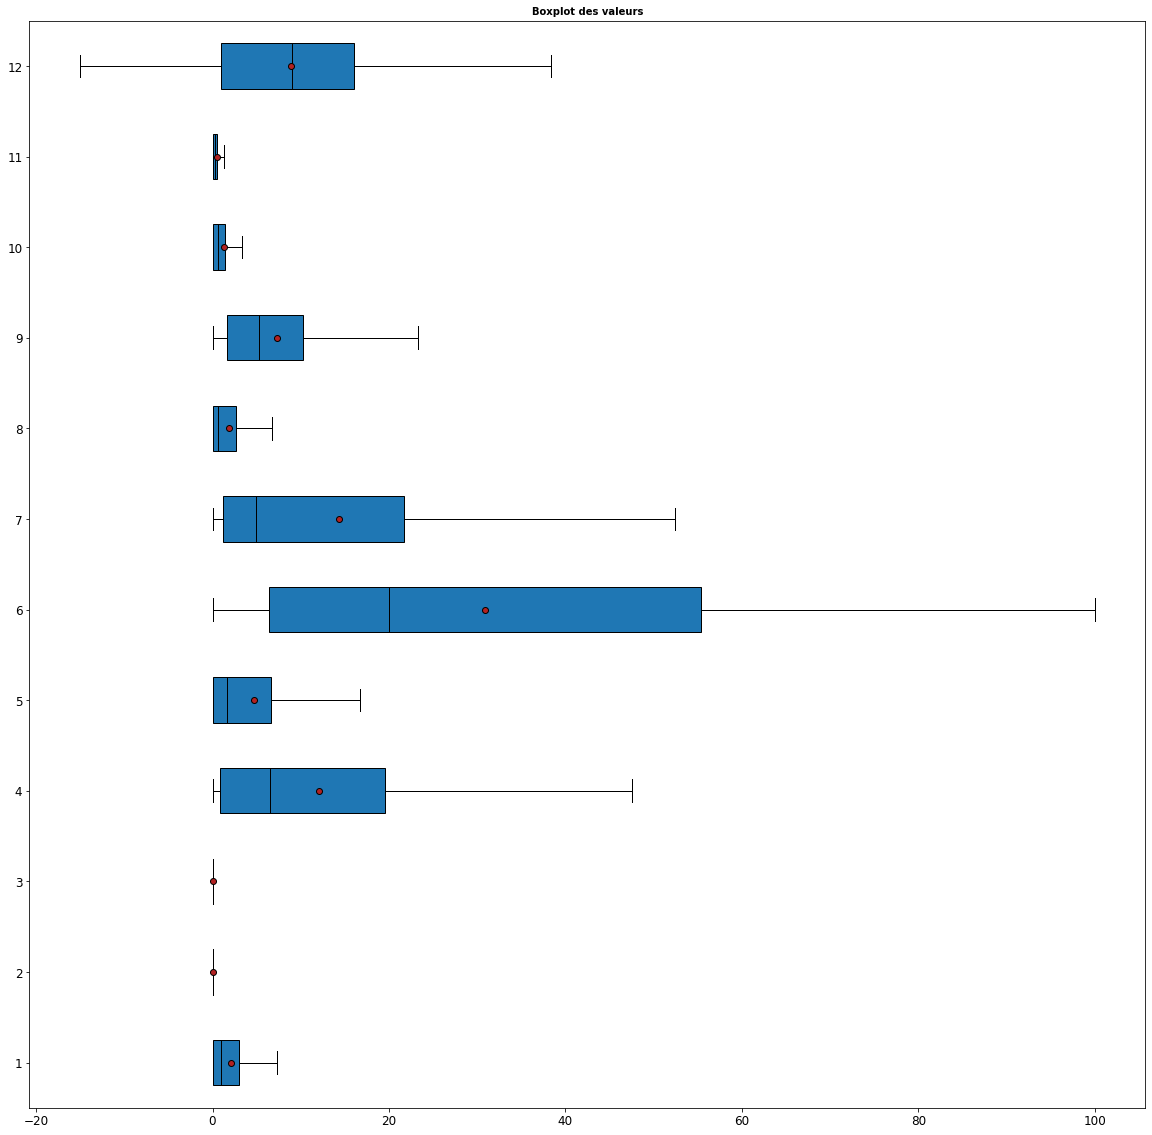

In [51]:
colonne = (["additives_n","palm_oil",
"maybe_palm_oil","fat_100g",
"saturated-fat","carbohydrates_100g",
"sugars","fiber_100g",
"proteins_100g","salt_100g",
"sodium","nutrition-score-fr" ])

fig,ax = plt.subplots(figsize=(20,20))
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.boxplot(df.loc[:,colonne], showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Boxplot des valeurs", fontsize=10,fontweight = 'bold')
plt.show()

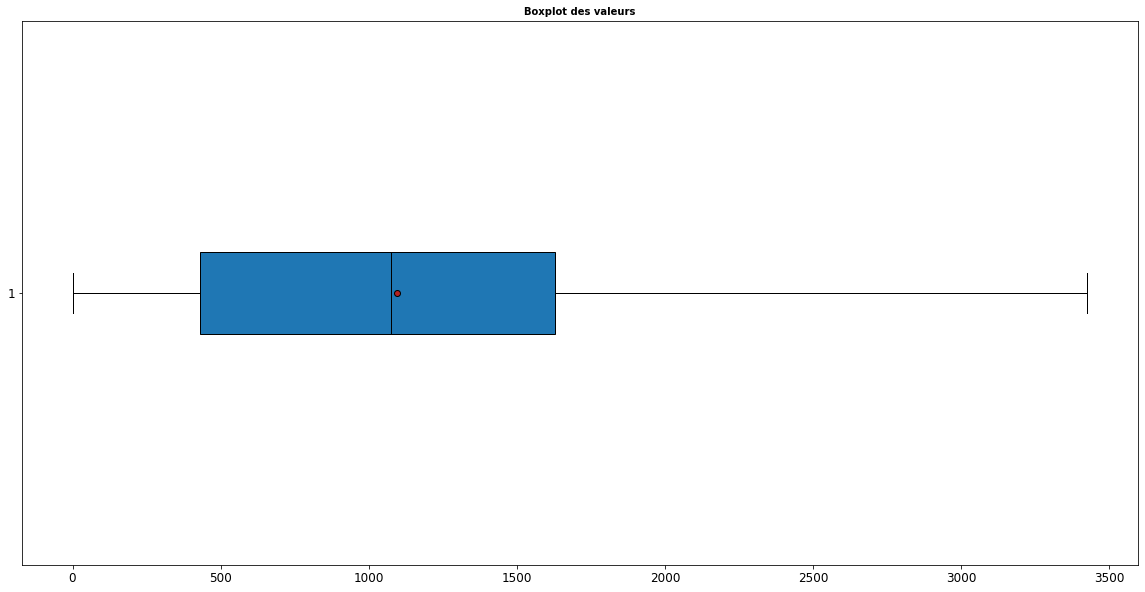

In [52]:
fig,ax = plt.subplots(figsize=(20,10))
plt.boxplot(df['energy'], showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Boxplot des valeurs", fontsize=10,fontweight = 'bold')
plt.show()

## 6. Corrélation

In [53]:
colonne = (['additives_n', 'palm_oil',
'maybe_palm_oil', 'energy', 'fat_100g', 'saturated-fat',
'carbohydrates_100g', 'sugars', 'fiber_100g', 'proteins_100g',
'salt_100g', 'sodium', 'nutrition-score-fr'])

C:\Users\cisso\AppData\Local\Temp/ipykernel_23224/206926961.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


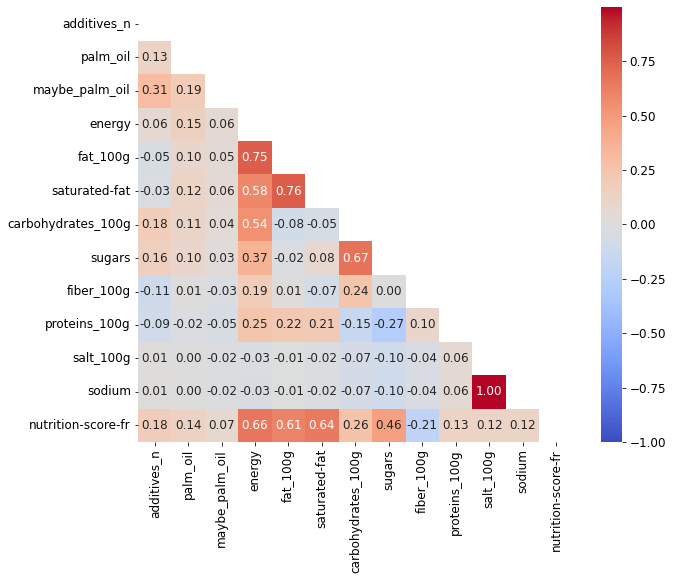

In [54]:
df_norm = df[colonne]
corr = df_norm.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, square=True, mask = mask, vmin = -1, fmt=".2f", cmap = 'coolwarm')
plt.show()

On va effectuer une regression linéaire sur les valeurs fortement corrélée

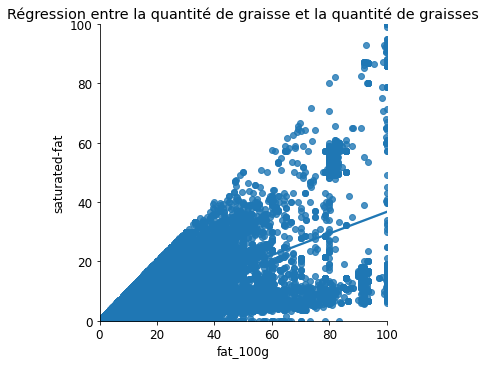

In [55]:
sns.lmplot(x="fat_100g", y="saturated-fat", data=df)
plt.title("Régression entre la quantité de graisse et la quantité de graisses")
plt.xlim(df["fat_100g"].min(), df["fat_100g"].max())
plt.ylim(df["saturated-fat"].min(), df["saturated-fat"].max())
plt.show()

In [56]:
pg.linear_regression(X=df["saturated-fat"], y=df["additives_n"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.117098,0.006787,311.912638,0.000000e+00,0.00083,0.000825,2.103794,2.130401
1,saturated-fat,-0.010285,0.000801,-12.841793,9.900308e-38,0.00083,0.000825,-0.011855,-0.008716


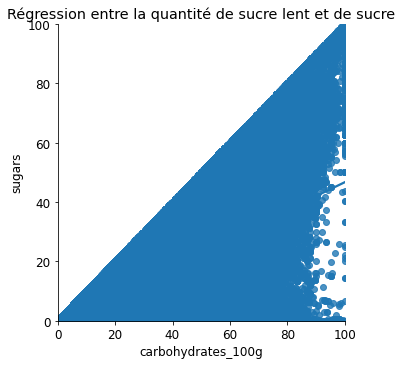

In [57]:
sns.lmplot(x="carbohydrates_100g", y="sugars", data=df)
plt.title("Régression entre la quantité de sucre lent et de sucre")
plt.xlim(df["carbohydrates_100g"].min(), df["carbohydrates_100g"].max())
plt.ylim(df["sugars"].min(), df["sugars"].max())
plt.show()

In [58]:
pg.linear_regression(X=df["carbohydrates_100g"], y=df["additives_n"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.551731,0.008367,185.463298,0.0,0.033556,0.033551,1.535333,1.568130
1,carbohydrates_100g,0.016757,0.000202,83.042045,0.0,0.033556,0.033551,0.016361,0.017152


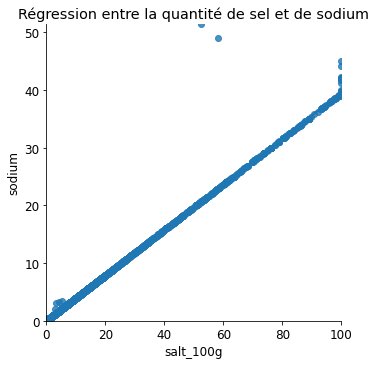

In [59]:
sns.lmplot(x="salt_100g", y="sodium", data=df)
plt.title("Régression entre la quantité de sel et de sodium")
plt.xlim(df["salt_100g"].min(), df["salt_100g"].max())
plt.ylim(df["sodium"].min(), df["sodium"].max())
plt.show()

In [60]:
pg.linear_regression(X=df["saturated-fat"], y=df["additives_n"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.117098,0.006787,311.912638,0.000000e+00,0.00083,0.000825,2.103794,2.130401
1,saturated-fat,-0.010285,0.000801,-12.841793,9.900308e-38,0.00083,0.000825,-0.011855,-0.008716


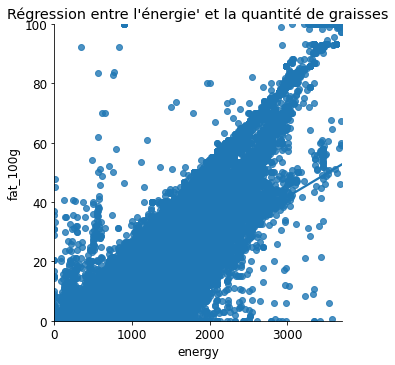

In [61]:
sns.lmplot(x="energy", y="fat_100g", data=df)
plt.title("Régression entre l'énergie' et la quantité de graisses")
plt.xlim(df["energy"].min(), df["energy"].max())
plt.ylim(df["fat_100g"].min(), df["fat_100g"].max())
plt.show()

In [62]:
pg.linear_regression(X=df["energy"], y=df["fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-5.013973,0.039846,-125.833856,0.0,0.568847,0.568845,-5.092070,-4.935876
1,energy,0.015568,0.000030,511.899386,0.0,0.568847,0.568845,0.015509,0.015628


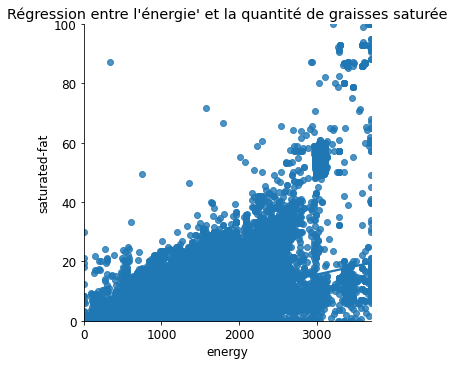

In [63]:
sns.lmplot(x="energy", y="saturated-fat", data=df)
plt.title("Régression entre l'énergie' et la quantité de graisses saturée")
plt.xlim(df["energy"].min(), df["energy"].max())
plt.ylim(df["saturated-fat"].min(), df["saturated-fat"].max())
plt.show()

In [64]:
pg.linear_regression(X=df["energy"], y=df["saturated-fat"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.642199,0.023662,-69.403594,0.0,0.336823,0.336819,-1.688575,-1.595823
1,energy,0.005736,0.000018,317.605963,0.0,0.336823,0.336819,0.005700,0.005771


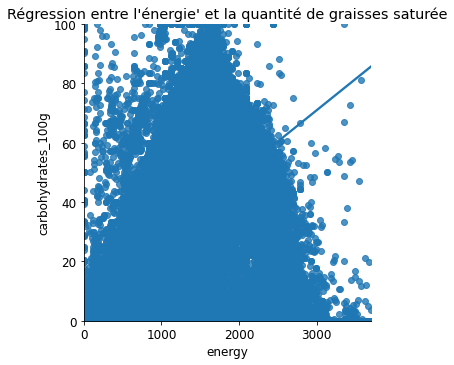

In [65]:
sns.lmplot(x="energy", y="carbohydrates_100g", data=df)
plt.title("Régression entre l'énergie' et la quantité de graisses saturée")
plt.xlim(df["energy"].min(), df["energy"].max())
plt.ylim(df["carbohydrates_100g"].min(), df["carbohydrates_100g"].max())
plt.show()

In [66]:
pg.linear_regression(X=df["energy"], y=df["carbohydrates_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.841325,0.095118,82.437733,0.0,0.296731,0.296728,7.654895,8.027754
1,energy,0.021016,0.000073,289.483307,0.0,0.296731,0.296728,0.020874,0.021159


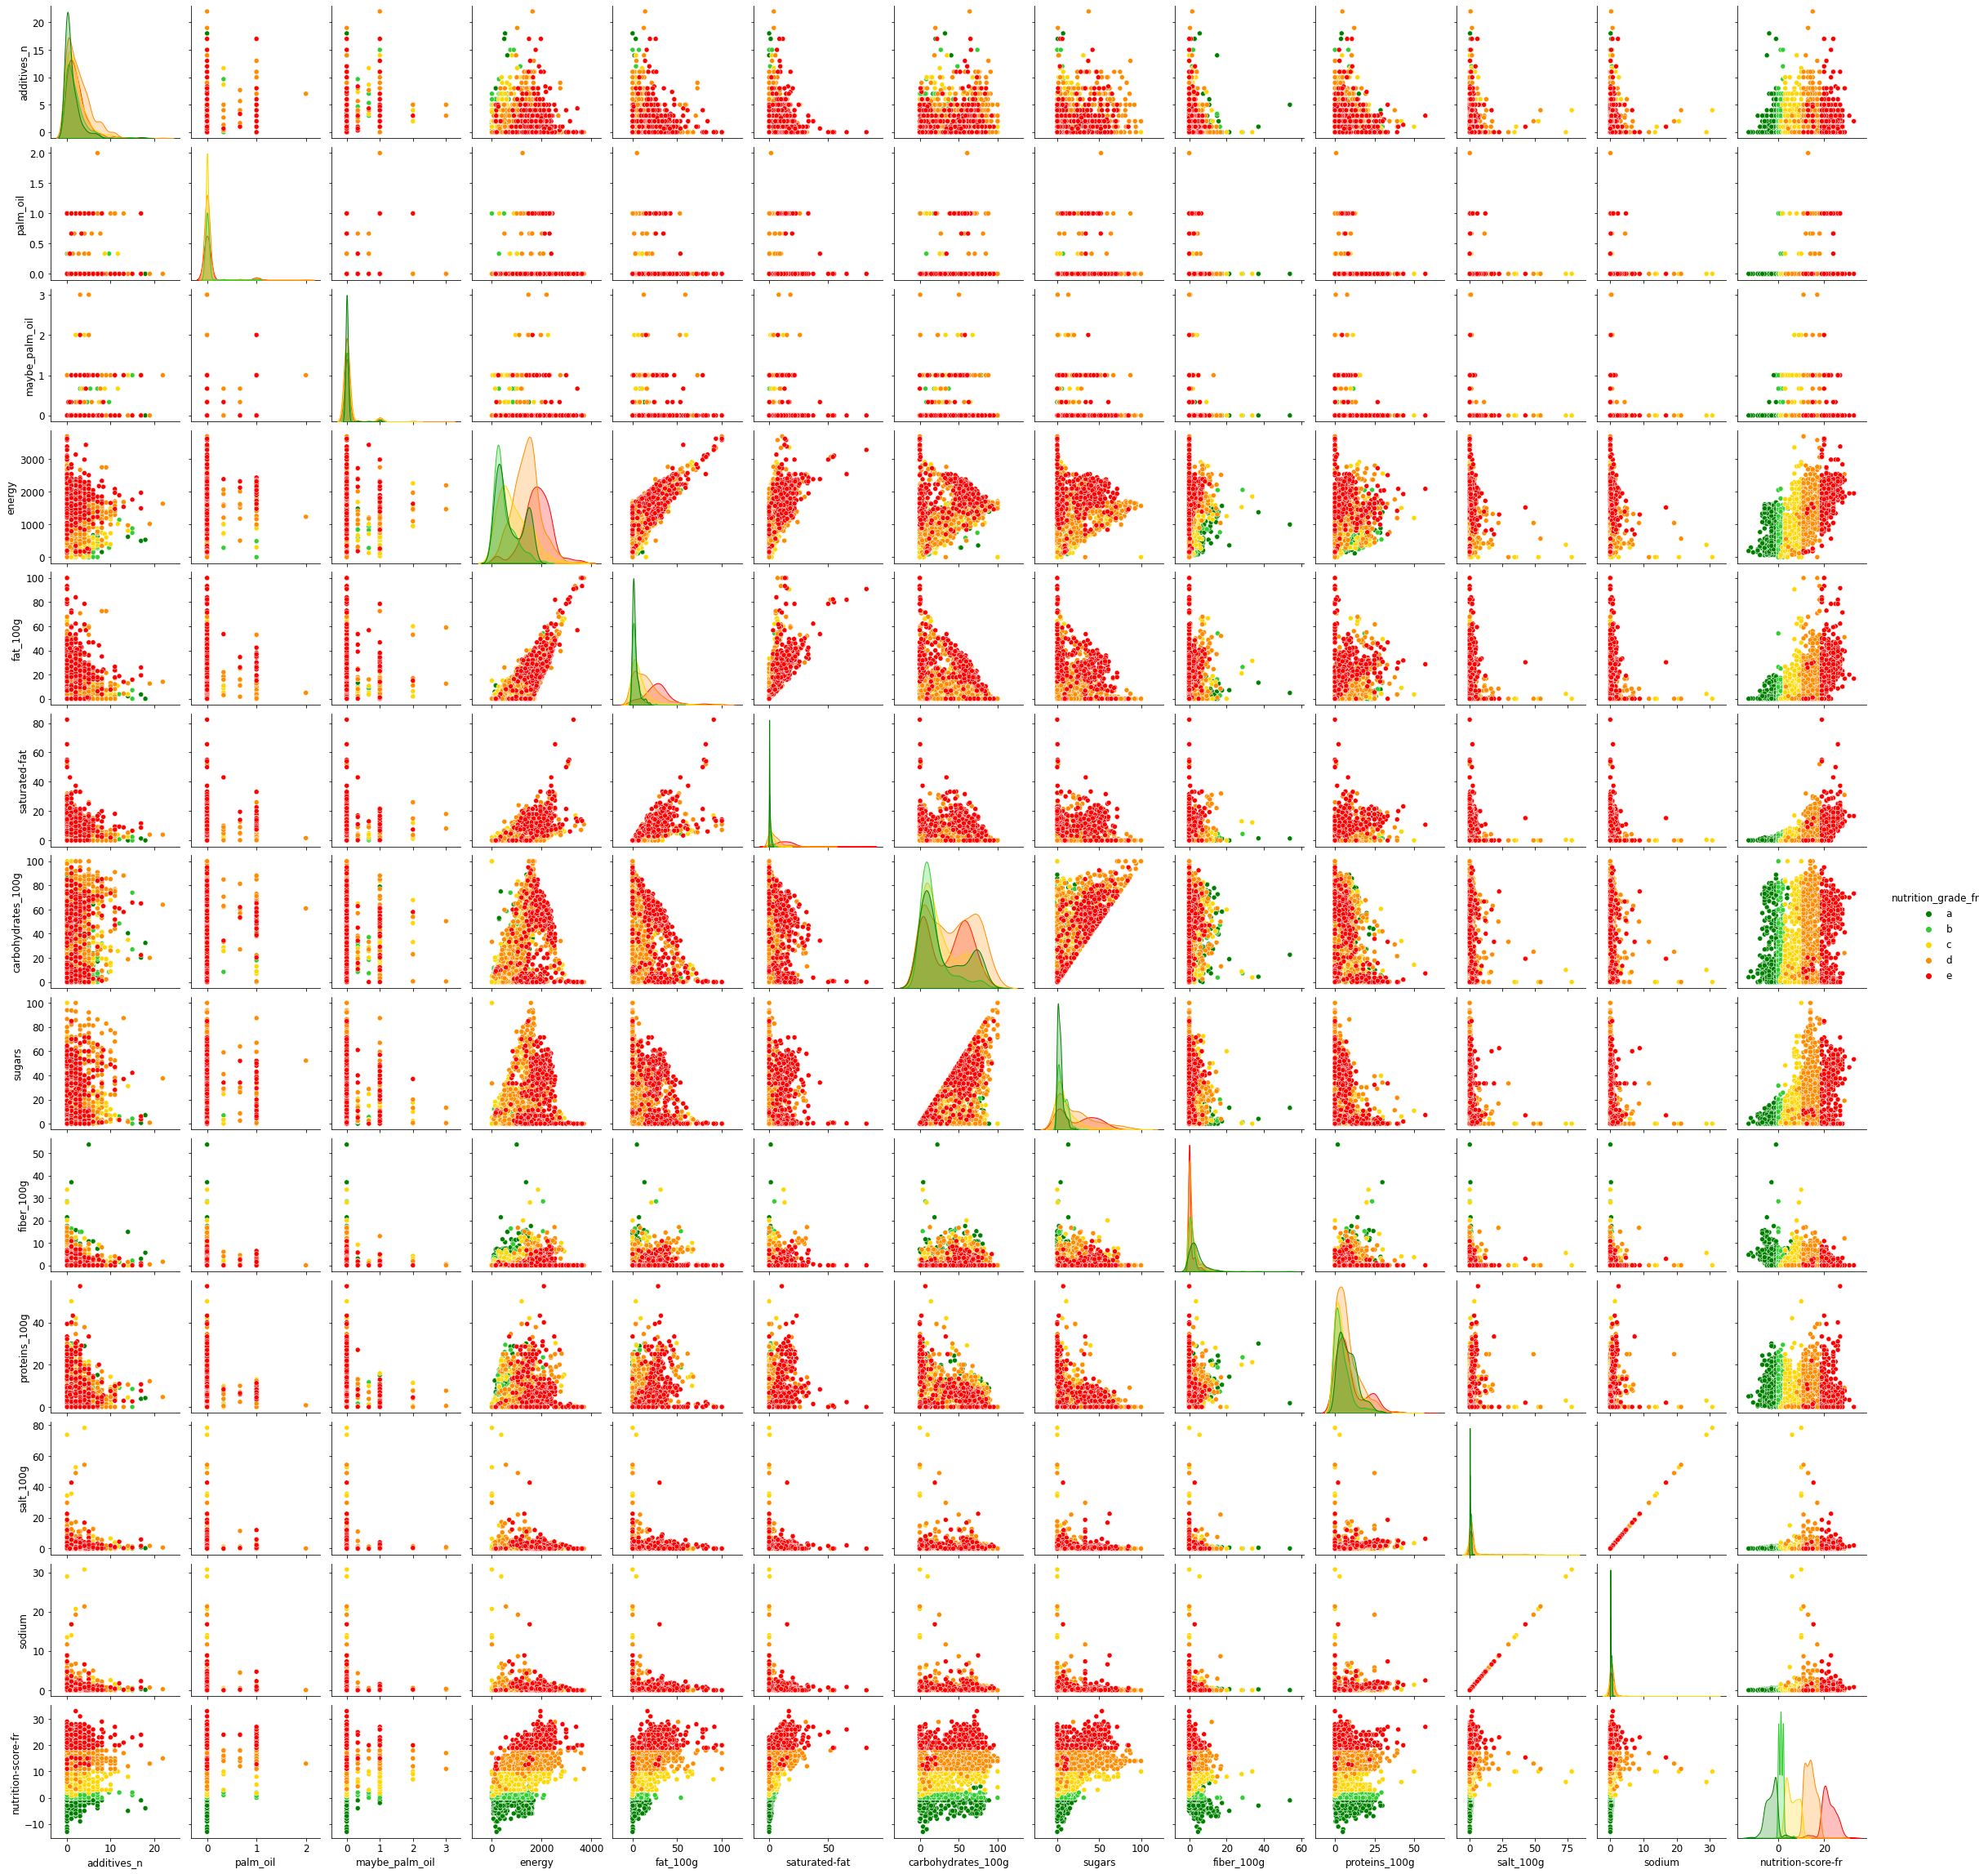

In [67]:
df = df.sort_values(by='nutrition_grade_fr')
sns.pairplot(data =df.sample(frac = 0.01).sort_values(by='nutrition_grade_fr'), hue ='nutrition_grade_fr', palette = palette)

## 7. ACP

In [68]:
df1 = df.drop('nutrition-score-fr',1)
df1 = df1.select_dtypes(include = 'float64')
scaler = StandardScaler()

pca =  PCA(n_components=df1.shape[1])
n_comp = df1.shape[1]

X = df1.values
features = df1.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_

C:\Users\cisso\AppData\Local\Temp/ipykernel_23224/3346793968.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1 = df.drop('nutrition-score-fr',1)


In [69]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Valeurs propres")
    plt.show(block=False)

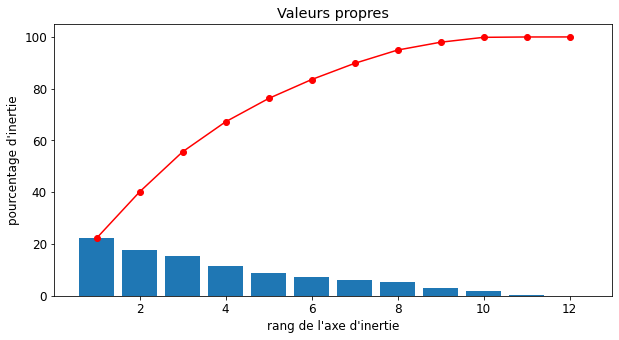

In [70]:
display_scree_plot(pca)

In [71]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

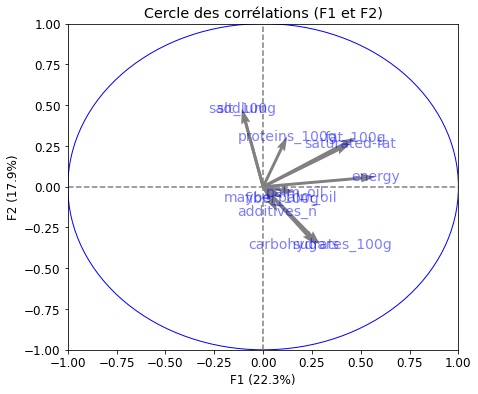

In [72]:
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Text(0.5, 1.0, 'Représentation des clusters du K-Means')

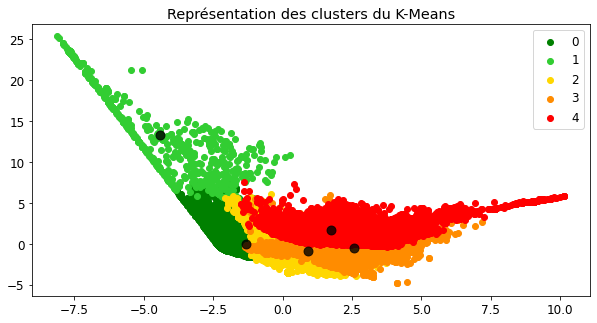

In [73]:
km = KMeans(n_clusters=5)
label = km.fit_predict(pca_components)

centroids = km.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(pca_components[label == i , 0] , pca_components[label == i , 1] , label = i, color = palette[i])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')

In [74]:
new_cols = ['F'+str(i) for i in range(1,13)]
df_components = pd.DataFrame(data = pca_components, columns = new_cols)
df_components['grade'] = df['nutrition_grade_fr']
df_components.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,grade
0,-0.121421,-0.803571,0.049934,1.052793,0.304659,0.074653,-0.203491,-0.606192,-1.382406,0.949170,0.046761,0.002087,d
1,-2.123064,-0.290987,-0.892249,-0.023277,-0.314160,0.673729,0.593000,-0.002991,0.124582,-0.011362,0.006251,0.001038,d
2,-1.968265,-0.224791,-0.935282,0.299357,0.255645,0.595874,0.632820,0.098112,0.269993,-0.002465,0.020322,0.001101,d
3,-2.123608,-0.288596,-0.889728,-0.022963,-0.314297,0.673789,0.593199,-0.003037,0.124672,-0.011374,0.006242,0.001027,a
4,-2.053626,-0.353517,-0.831117,0.079708,-0.222677,0.674115,0.638427,0.020768,0.184110,-0.023956,0.010705,0.000990,d


## 8. Anova

In [75]:
def eta_squared(x ,y):
    """
    Entrée : Deux colonnes d'une DataFrame
    Objectifs : Calcule de la p_valeur
    Sortie : p_valeur
    """
    
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

##############################################


def calcul_anova(data):
    """
    Entrée : DataFrame
    Objectifs : Calculer la p_valeur est la mettre dans un DataFrame
    Sortie : DataFrame avec les ingredients avec la p_valeur   
    """
    
    # qualitative
    X = 'grade'
    Y = data.select_dtypes(include = 'float64').columns# quantitative
    p_value = []
    ingredient = []
    for y in Y:     
        p_value.append(eta_squared(data[X],data[y]))
        ingredient.append(y)
    return(pd.DataFrame(np.column_stack([ingredient, p_value]), columns=['ingredient', 'p_value']))

In [76]:
df_test = df_components.sample(frac = 0.05)
calcul_anova(df_test)

,ingredient,p_value
0,F1,0.0008569879146137851
1,F2,1.5361381441365253e-05
2,F3,0.00039734400421744085
3,F4,0.00017663215300611884
4,F5,0.0003484211310635562
5,F6,0.00016986474064909738
6,F7,0.000381286994217761
7,F8,0.0013699577295887232
8,F9,0.00024128613378681188
9,F10,0.00012703914041431685


## 10. Application

additifs : 31.0
huile de palme : 1.0
Nutriscore : e


Text(0.5, 1.0, 'Micamu Weich Mous')

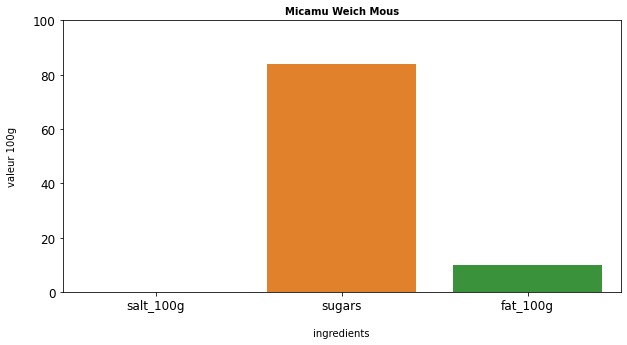

In [110]:
col = ['product_name','additives_n','palm_oil','salt_100g','sugars','fat_100g','nutrition_grade_fr']
df_appli = df.copy()
df_appli = df_appli[df_appli['product_name']=='Micamu Weich Mous']
df_appli = df_appli[col]

print('additifs :',df_appli['additives_n'].to_string(index=False))
print('huile de palme :',df_appli['palm_oil'].to_string(index=False))
print('Nutriscore :',df_appli['nutrition_grade_fr'].to_string(index=False))

sns.barplot(data = df_appli.loc[:,'salt_100g':'fat_100g'])
plt.ylim([0, 100])
plt.xlabel('\ningredients', fontsize=10)
plt.ylabel('valeur 100g\n', fontsize=10)
plt.title('Micamu Weich Mous', fontsize=10,fontweight = 'bold')